In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import random

Goal:  
Create a dataframe that has a row for each player for a given season plus one for career  
Will also include features for the least 3 years averaged

In [4]:
df_pst = pd.read_csv('../data/nat_stat_trick/2018_pst_nst.csv')
df_oirel = pd.read_csv('../data/nat_stat_trick/2018_oirel_nst.csv')
df_woirel = pd.read_csv('../data/nat_stat_trick/2018wind_oirel_nst.csv')

In [6]:
df_pst.head()

,Unnamed: 0,Player,Team,Position,GP,TOI,Goals,Total Assists,First Assists,Second Assists,...,Misconduct,Penalties Drawn,Giveaways,Takeaways,Hits,Hits Taken,Shots Blocked,Faceoffs Won,Faceoffs Lost,Faceoffs %
0,2018,Nikita Kucherov,T.B,R,82,1637.166667,41,87,53,34,...,1,24,89,58,44,101,31,0,3,0.00
1,2018,Connor McDavid,EDM,C,78,1781.300000,41,75,57,18,...,0,35,89,99,39,108,30,428,490,46.62
2,2018,Patrick Kane,CHI,R,81,1821.616667,44,66,40,26,...,0,23,54,42,21,96,18,1,4,20.00
3,2018,Leon Draisaitl,EDM,C,82,1852.450000,50,55,33,22,...,0,29,116,71,57,121,26,677,663,50.52
4,2018,Sidney Crosby,PIT,C,79,1658.350000,35,65,49,16,...,1,25,67,54,85,88,43,1012,814,55.42


In [5]:
df_pst['Unnamed: 0'] = 2018
df_oirel['Unnamed: 0'] = 2018
df_woirel['Unnamed: 0'] = 2018

In [7]:
df_pst.shape

(906, 34)

In [8]:
df_pst.head()

,Unnamed: 0,Player,Team,Position,GP,TOI,Goals,Total Assists,First Assists,Second Assists,...,Misconduct,Penalties Drawn,Giveaways,Takeaways,Hits,Hits Taken,Shots Blocked,Faceoffs Won,Faceoffs Lost,Faceoffs %
0,2018,Nikita Kucherov,T.B,R,82,1637.166667,41,87,53,34,...,1,24,89,58,44,101,31,0,3,0.00
1,2018,Connor McDavid,EDM,C,78,1781.300000,41,75,57,18,...,0,35,89,99,39,108,30,428,490,46.62
2,2018,Patrick Kane,CHI,R,81,1821.616667,44,66,40,26,...,0,23,54,42,21,96,18,1,4,20.00
3,2018,Leon Draisaitl,EDM,C,82,1852.450000,50,55,33,22,...,0,29,116,71,57,121,26,677,663,50.52
4,2018,Sidney Crosby,PIT,C,79,1658.350000,35,65,49,16,...,1,25,67,54,85,88,43,1012,814,55.42


In [25]:
df_pst.shape

(890, 34)

In [9]:
for y in range(2017, 2006, -1):
    if y > 2008:
        twoirel = pd.read_csv('../data/nat_stat_trick/{}wind_oirel_nst.csv'.format(y))
        twoirel['Unnamed: 0'] = y
        df_woirel = pd.concat((df_woirel, twoirel))
    
    tpst = pd.read_csv('../data/nat_stat_trick/{}_pst_nst.csv'.format(y))
    toirel = pd.read_csv('../data/nat_stat_trick/{}_oirel_nst.csv'.format(y))

    tpst['Unnamed: 0'] = y
    toirel['Unnamed: 0'] = y

    df_pst = pd.concat((df_pst, tpst))
    df_oirel = pd.concat((df_oirel, toirel))


In [10]:
df_pst.shape

(10590, 34)

In [11]:
df_oirel.shape

(10590, 52)

In [12]:
df_woirel.shape

(11540, 52)

In [39]:
df_pst.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9684 entries, 0 to 851
Data columns (total 34 columns):
Unnamed: 0          9684 non-null int64
Player              9684 non-null object
Team                9684 non-null object
Position            9684 non-null object
GP                  9684 non-null int64
TOI                 9684 non-null float64
Goals               9684 non-null int64
Total Assists       9684 non-null int64
First Assists       9684 non-null int64
Second Assists      9684 non-null int64
Total Points        9684 non-null int64
IPP                 9684 non-null object
Shots               9684 non-null int64
SH%                 9684 non-null object
iCF                 9684 non-null int64
iFF                 9684 non-null int64
iSCF                9684 non-null int64
iHDCF               9684 non-null int64
Rush Attempts       9684 non-null int64
Rebounds Created    9684 non-null int64
PIM                 9684 non-null int64
Total Penalties     9684 non-null int64
Minor  

In [13]:
df_pst.Position.value_counts()

D       3630
C       2863
L       2063
R       1887
C, L      81
C, R      44
L, R      21
D, R       1
Name: Position, dtype: int64

In [41]:
df_woirel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10354 entries, 0 to 1175
Data columns (total 52 columns):
Unnamed: 0               10354 non-null int64
Player                   10354 non-null object
Team                     10354 non-null object
Position                 10354 non-null object
GP                       10354 non-null int64
TOI                      10354 non-null float64
TOI/GP                   10354 non-null float64
CF/60 Rel                10354 non-null float64
CA/60 Rel                10354 non-null float64
CF% Rel                  10354 non-null object
FF/60 Rel                10354 non-null float64
FA/60 Rel                10354 non-null float64
FF% Rel                  10354 non-null object
SF/60 Rel                10354 non-null float64
SA/60 Rel                10354 non-null float64
SF% Rel                  10354 non-null object
GF/60 Rel                10354 non-null float64
GA/60 Rel                10354 non-null float64
GF% Rel                  10354 non-nul

In [14]:
careers = df_pst.groupby('Player').sum()

In [15]:
careers.shape

(2371, 28)

In [46]:
careers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2236 entries, A.J. Greer to Zenon Konopka
Data columns (total 28 columns):
Unnamed: 0          2236 non-null int64
GP                  2236 non-null int64
TOI                 2236 non-null float64
Goals               2236 non-null int64
Total Assists       2236 non-null int64
First Assists       2236 non-null int64
Second Assists      2236 non-null int64
Total Points        2236 non-null int64
Shots               2236 non-null int64
iCF                 2236 non-null int64
iFF                 2236 non-null int64
iSCF                2236 non-null int64
iHDCF               2236 non-null int64
Rush Attempts       2236 non-null int64
Rebounds Created    2236 non-null int64
PIM                 2236 non-null int64
Total Penalties     2236 non-null int64
Minor               2236 non-null int64
Major               2236 non-null int64
Misconduct          2236 non-null int64
Penalties Drawn     2236 non-null int64
Giveaways           2236 non-null int6

In [47]:
df_oirel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9684 entries, 0 to 851
Data columns (total 52 columns):
Unnamed: 0               9684 non-null int64
Player                   9684 non-null object
Team                     9684 non-null object
Position                 9684 non-null object
GP                       9684 non-null int64
TOI                      9684 non-null float64
TOI/GP                   9684 non-null float64
CF/60 Rel                9684 non-null float64
CA/60 Rel                9684 non-null float64
CF% Rel                  9684 non-null object
FF/60 Rel                9684 non-null float64
FA/60 Rel                9684 non-null float64
FF% Rel                  9684 non-null object
SF/60 Rel                9684 non-null float64
SA/60 Rel                9684 non-null float64
SF% Rel                  9684 non-null object
GF/60 Rel                9684 non-null float64
GA/60 Rel                9684 non-null float64
GF% Rel                  9684 non-null object
SCF/60 Rel  

### EDA / Plotting

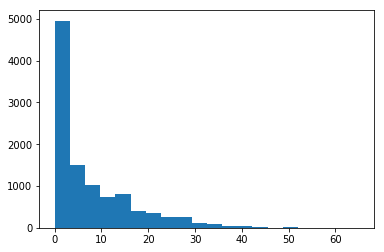

In [16]:
plt.hist(df_pst['Goals'], bins = 20)
plt.show()

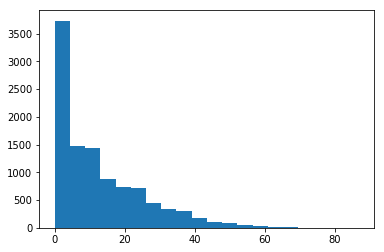

In [17]:
plt.hist(df_pst['Total Assists'], bins = 20)
plt.show()

In [18]:
df_pst['Goals'].sum(), df_pst['Total Assists'].sum()

(79001, 134530)

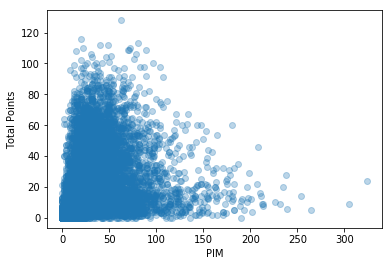

In [19]:
plt.scatter(df_pst['PIM'], df_pst['Total Points'], alpha = 0.3)
plt.xlabel('PIM')
plt.ylabel('Total Points')
plt.show()

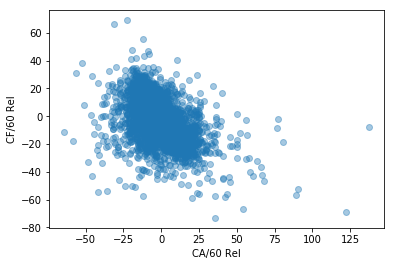

In [20]:
plt.scatter(df_oirel['CA/60 Rel'], df_oirel['CF/60 Rel'], alpha = 0.4)
plt.xlabel('CA/60 Rel')
plt.ylabel('CF/60 Rel')
plt.show()

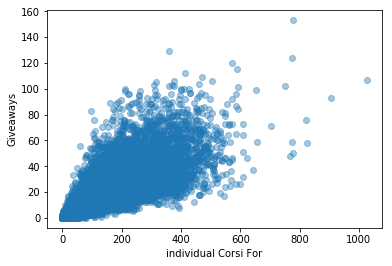

In [61]:
plt.scatter(df_pst['iCF'], df_pst['Giveaways'], alpha = 0.4)
plt.xlabel('individual Corsi For')
plt.ylabel('Giveaways')
plt.show()

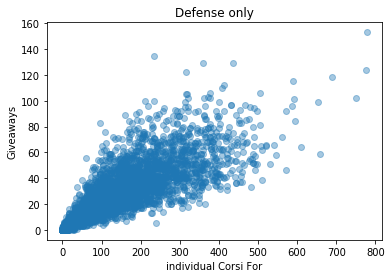

In [21]:
plt.scatter(df_pst[df_pst.Position == 'D']['iCF'], df_pst[df_pst.Position == 'D']['Giveaways'], alpha = 0.4)
plt.xlabel('individual Corsi For')
plt.ylabel('Giveaways')
plt.title('Defense only')
plt.show()

In [22]:
df_pst.to_csv('../data/up_all_pst.csv')
df_oirel.to_csv('../data/up_all_oirel.csv')
df_woirel.to_csv('../data/up_all_woirel.csv')

In [25]:
df_pst.head()

,Unnamed: 0,Player,Team,Position,GP,TOI,Goals,Total Assists,First Assists,Second Assists,...,Misconduct,Penalties Drawn,Giveaways,Takeaways,Hits,Hits Taken,Shots Blocked,Faceoffs Won,Faceoffs Lost,Faceoffs %
0,2018,Nikita Kucherov,T.B,R,82,1637.166667,41,87,53,34,...,1,24,89,58,44,101,31,0,3,0.00
1,2018,Connor McDavid,EDM,C,78,1781.300000,41,75,57,18,...,0,35,89,99,39,108,30,428,490,46.62
2,2018,Patrick Kane,CHI,R,81,1821.616667,44,66,40,26,...,0,23,54,42,21,96,18,1,4,20.00
3,2018,Leon Draisaitl,EDM,C,82,1852.450000,50,55,33,22,...,0,29,116,71,57,121,26,677,663,50.52
4,2018,Sidney Crosby,PIT,C,79,1658.350000,35,65,49,16,...,1,25,67,54,85,88,43,1012,814,55.42


In [30]:
df_pst['Season_Player'] = df_pst['Unnamed: 0'].apply(lambda x: str(x))
df_pst['Season_Player'] = df_pst['Season_Player'] + ' ' + df_pst['Player']
df_pst.set_index(df_pst['Season_Player'], inplace=True)
df_pst.drop('Season_Player', axis=1, inplace=True)
df_pst.rename({'Unnamed: 0': 'Season'}, axis='columns', inplace=True)
df_pst.sample(5)

,Season,Player,Team,Position,GP,TOI,Goals,Total Assists,First Assists,Second Assists,...,Misconduct,Penalties Drawn,Giveaways,Takeaways,Hits,Hits Taken,Shots Blocked,Faceoffs Won,Faceoffs Lost,Faceoffs %
Season_Player,,,,,,,,,,,,,,,,,,,,,
2012 Carl Hagelin,2012,Carl Hagelin,NYR,L,48,830.816667,10,14,9,5,...,0,22,20,13,49,81,28,7,10,41.18
2016 Mike Green,2016,Mike Green,DET,D,72,1696.050000,14,22,14,8,...,0,15,52,24,67,127,92,0,0,-
2009 Chad LaRose,2009,Chad LaRose,CAR,R,56,879.383333,11,17,9,8,...,0,10,16,27,120,78,14,2,10,16.67
2017 Joel Ward,2017,Joel Ward,S.J,R,52,617.450000,5,7,4,3,...,0,8,13,21,35,57,27,107,124,46.32
2015 Jared McCann,2015,Jared McCann,VAN,C,69,864.016667,9,9,4,5,...,0,17,26,30,45,41,19,181,341,34.67


In [31]:
df_pst.to_csv('../data/up_all_pst.csv')